In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
im1 = plt.imread('rgb_image_10.png')
dep1 = sio.loadmat('depth_10.mat')['depth_array']
pts = sio.loadmat('pts_10_14.mat')
calib = sio.loadmat('calib_asus.mat')

In [3]:
kdepth = calib['Depth_cam'][0][0][0]
krgb = calib['RGB_cam'][0][0][0]
R = calib['R_d_to_rgb']
T = calib['T_d_to_rgb']
RTrgb = np.concatenate((R, T), axis=1)
kdinverse = np.linalg.inv(kdepth)


In [4]:
def depth_to_rgb(coords, Z):
    kdinversea = np.concatenate((kdinverse, np.array([[0, 0, 1/Z]])), axis=0)
    # return rounded values
    return krgb @ RTrgb @ kdinversea @ coords

In [5]:
points = []

for i in range(480):
    for j in range(640):
        if dep1[i][j] != 0:
            points.append([i, j, dep1[i][j]])

rgb = []

for i in points:
    if i[2] == 0:
        continue
    aux = depth_to_rgb(np.array([i[0], i[1], 1]), i[2]).astype(int)
    rgb.append(im1[aux[0]][aux[1]])

limit = 1000

rgb = np.array(rgb[:])
points = np.array(points[:])


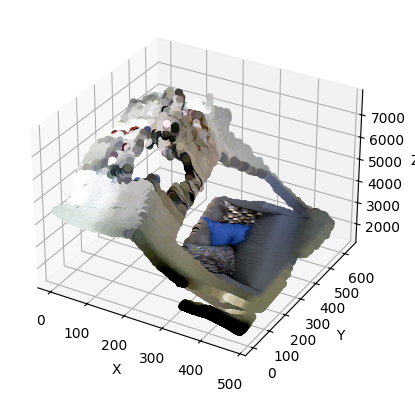

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Assuming points is an N x 3 numpy array where N is the number of points
# and rgb is an N x 3 numpy array where each row is the RGB color of the corresponding point
ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=rgb)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()